# Wave-Glider analysis

This is the python version of what is done int this notebook [Studying_waves.ipynb][def]

[def]: Studying_waves.ipynb

In [61]:
import importlib

# these are my code
from stat_wave_1D import stat_wave_1D, fast_psd


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt, detrend
from scipy.signal import find_peaks


In [62]:
glider = pd.read_csv('../data/Cleaned_Combined_Data.csv', parse_dates=['Timestamp'])  # automatically uses the first row as header
orcasim = pd.read_csv('../data/OffshoreTestSurrogateSims.csv'); 

In [63]:
glider[1:3]

,Timestamp,Quad[0],Quad[1],Quad[2],Quad[3],PQR[0],PQR[1],PQR[2],ACC[0],ACC[1],ACC[2],Euler[0],Euler[1],Euler[2]
1,2025-02-13 08:05:15.171,0.42275,0.17345,-0.06288,0.88727,-0.07495,-0.04282,0.03635,-3.15955,8.90044,-0.23389,2.01335,-21.09387,128.71100
2,2025-02-13 08:05:15.269,0.42217,0.17087,-0.06451,0.88793,-0.05630,-0.03247,0.03191,-3.18040,8.90886,-0.27861,1.74466,-20.91110,128.84535


In [64]:
orcasim[1:3]

,Time,X,Y,Z,Surge,Sway,Heave,Roll,Pitch,Yaw,...,ACCz,PQRx,PQRy,PQRz,x velocity,y velocity,z velocity,x angular velocity,y angular velocity,z angular velocity
1,-7.9,-5.330000e-07,-0.000001,-0.399998,-5.330000e-07,-0.000001,0.000002,-9.600000e-07,-1.370000e-07,4.520000e-07,...,0.002724,-0.000016,-0.000003,0.000010,-0.000022,-0.000062,0.000097,-6.630000e-07,-1.010000e-07,3.350000e-07
2,-7.8,-6.290000e-06,-0.000020,-0.399968,-6.290000e-06,-0.000020,0.000032,-1.030000e-05,-1.870000e-06,6.490000e-06,...,0.006755,-0.000021,-0.000006,0.000024,-0.000099,-0.000341,0.000568,-2.670000e-06,-5.570000e-07,2.010000e-06


## Glider data only

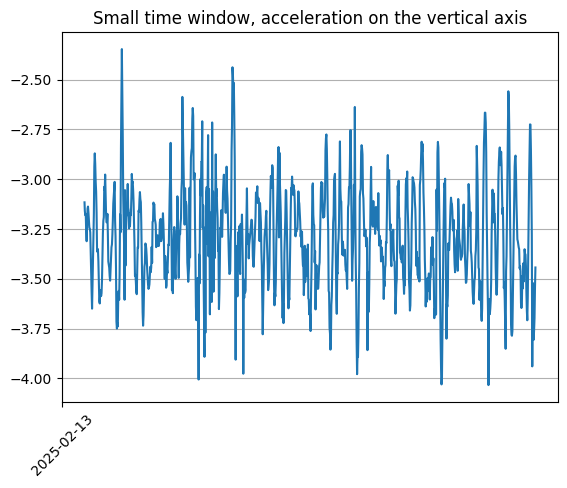

In [65]:
import matplotlib.dates as mdates
real_time= glider['Timestamp'].values

plt.plot(real_time[:1000], glider['ACC[0]'][:1000])
plt.xticks(rotation=45)
plt.title('Small time window, acceleration on the vertical axis')
# Format x-axis ticks to show month and day
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # e.g., "Feb 13"
# # Optional: set major ticks every few days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.grid()
plt.show()

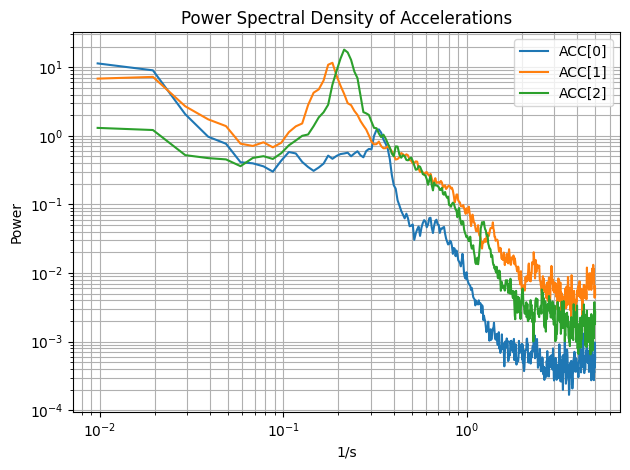

In [66]:
# fast_psd(x, nfft_in, fs):

# Angular velocity (rad/s)
P, k = fast_psd(glider['ACC[0]'], 2**10, 10)  # heave (z) up-down motion
P2, _ = fast_psd(glider['ACC[1]'], 2**10, 10) # surge (y) forwrd-backward motion
P3, _ = fast_psd(glider['ACC[2]'], 2**10, 10) # sway (x) side-to-side motion



plt.loglog(k, P, label='ACC[0]')
plt.loglog(k, P2, label='ACC[1]')
plt.loglog(k, P3, label='ACC[2]')

# plt.axvline(x=results['f_peak'], color='r', linestyle='--', label='f_peak')  # vertical line

plt.xlabel('1/s')               # X-axis label
plt.ylabel('Power')            # Optional Y-axis label
plt.grid(True, which='both')   # Turn on grid for both major and minor ticks
plt.legend()                   # Add legend
plt.title('Power Spectral Density of Accelerations')  # Add title
plt.tight_layout()             # Improve spacing
plt.show()


### Dominant Height and wave period

Significant Wave Height Hs: 1.1201188064262608 meters
Dominant Frequency: 0.107421875 Hz
Peak Period: 9.309090909090909 seconds


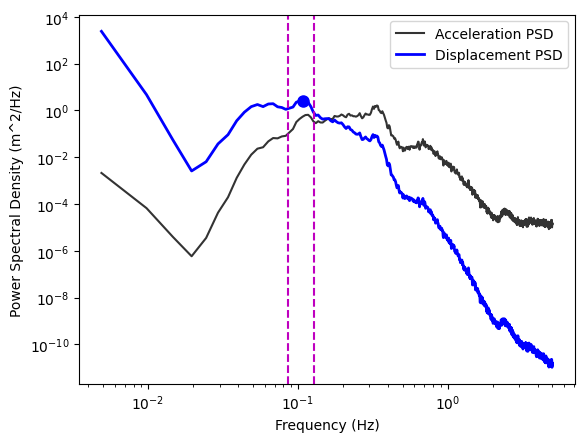

In [67]:
f_min = 0.05  # Minimum frequency to consider (Hz)
f_max = 10.0  # Maximum frequency to consider (Hz)
fs = 10.0  # Sampling frequency (Hz)
fc = 0.05 # cutoff frequency for filtering high pass

ac = glider['ACC[0]'] < -7.5      #remove when glider is not vertical
data = glider['ACC[0]'][ac] 

results = stat_wave_1D(data, fs, fc,  f_min, f_max)
results_1D = results


## Model data COMPARISON

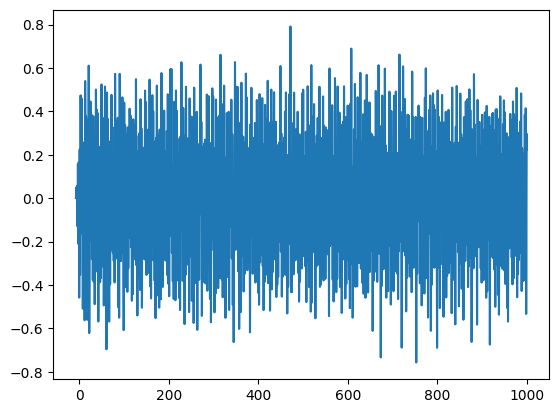

In [68]:
plt.plot(orcasim['Time'], orcasim['ACCz'])


Significant Wave Height Hs: 0.6685063598232025 meters
Dominant Frequency: 0.05859375 Hz
Peak Period: 17.066666666666666 seconds


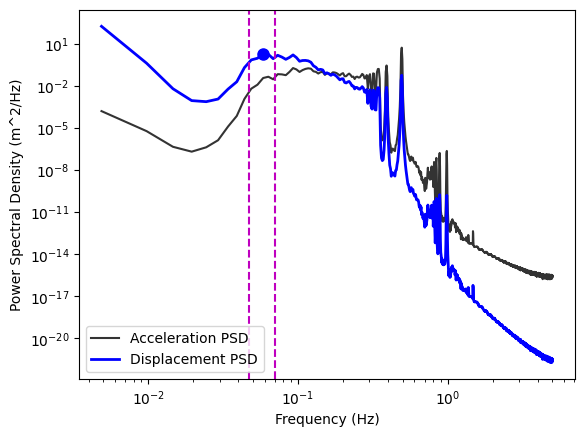

In [69]:
f_min = 0.05  # Minimum frequency to consider (Hz)
f_max = 10.0  # Maximum frequency to consider (Hz)
fs = 10.0  # Sampling frequency (Hz)
fc = 0.05 # cutoff frequency for filtering high pass

data = orcasim['ACCz']
results_sim = stat_wave_1D(data, fs, fc, f_min, f_max)

This is very interesting. The simulation that a much longer period 17 seconds!

The figure above showcases how to estimate the signfinican wave height and the dominant wave frequency from the glider heave. 


In [70]:
results

{'P_eta': array([2.40749435e+03, 4.72201744e+00, 5.49770177e-02, ...,
        1.60588981e-11, 1.32042105e-11, 1.50473336e-11]),
 'k': array([4.88281250e-03, 9.76562500e-03, 1.46484375e-02, ...,
        4.99023438e+00, 4.99511719e+00, 5.00000000e+00]),
 'a_z_filtered': array([ 0.12486589, -0.29564033, -0.81432432, ..., -0.02357626,
         0.0123786 ,  0.11605929]),
 'H_s': np.float64(1.1201188064262608),
 'f_peak': np.float64(0.107421875),
 'T_peak': np.float64(9.309090909090909),
 't': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 4.0826e+03, 4.0827e+03,
        4.0828e+03])}

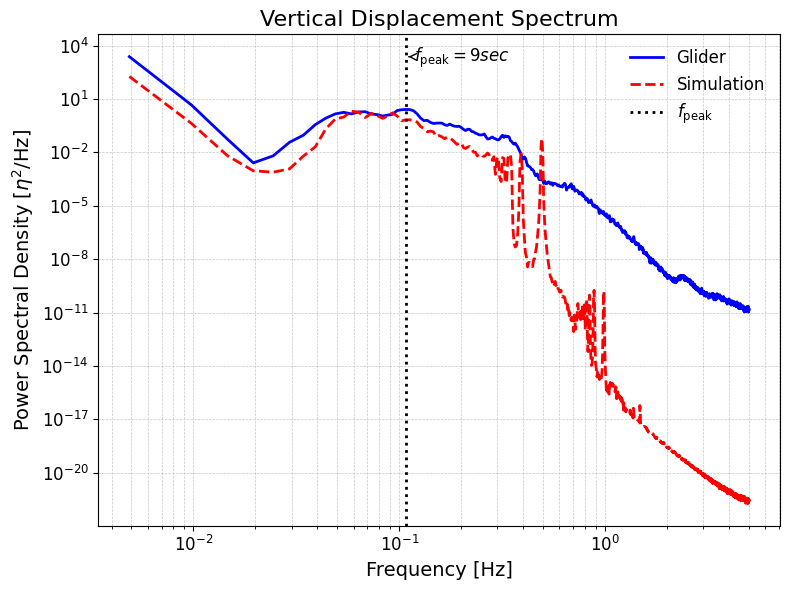

In [71]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the spectral densities
ax.plot(results['k'], results['P_eta'], label='Glider', color='blue', linewidth=2)
ax.plot(results_sim['k'], results_sim['P_eta'], label='Simulation', color='red', linestyle='--', linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')

# Vertical line for f_peak
f_peak = results['f_peak']
ax.axvline(x=f_peak, color='black', linestyle=':', linewidth=2, label=r'$f_{\mathrm{peak}}$')

# Annotate the vertical line
ax.annotate(r'$f_{\mathrm{peak}} = 9 sec$',  xy=(f_peak, max(results['P_eta'])), xytext=(f_peak * 1.1, max(results['P_eta']) * 0.5),
            textcoords='data',
            arrowprops=dict(arrowstyle="->   ", color='black'),
            fontsize=12)

ax.set_xlabel(r'Frequency [Hz]', fontsize=14)
ax.set_ylabel(r'Power Spectral Density [$\eta^2$/Hz]', fontsize=14)
ax.set_title('Vertical Displacement Spectrum', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(fontsize=12, loc='best', frameon=False)
plt.tight_layout()
plt.show()


### Spectra from all acelerations



In [72]:
# data
ac = glider['ACC[0]'] < -7.5      #remove when glider is not vertical


data = glider['ACC[1]'][ac] 
results_y = stat_wave_1D(data, fs, fc,  f_min, f_max, make_figure = False)
# glider['sway'] = results_p
data = glider['ACC[2]'][ac] 
results_x = stat_wave_1D(data, fs, fc,  f_min, f_max, make_figure = False)

# Simulations
data = orcasim['ACCx']
results_sim_x = stat_wave_1D(data, fs, fc, f_min, f_max, make_figure = False)
data = orcasim['ACCy']
results_sim_y = stat_wave_1D(data, fs, fc, f_min, f_max, make_figure = False)



Significant Wave Height Hs: 2.379631042266558 meters
Dominant Frequency: 0.185546875 Hz
Peak Period: 5.389473684210526 seconds
Significant Wave Height Hs: 2.2027855360619055 meters
Dominant Frequency: 0.21484375 Hz
Peak Period: 4.654545454545454 seconds
Significant Wave Height Hs: 0.5142385840548122 meters
Dominant Frequency: 0.05859375 Hz
Peak Period: 17.066666666666666 seconds
Significant Wave Height Hs: 0.6892027733571227 meters
Dominant Frequency: 0.0732421875 Hz
Peak Period: 13.653333333333334 seconds


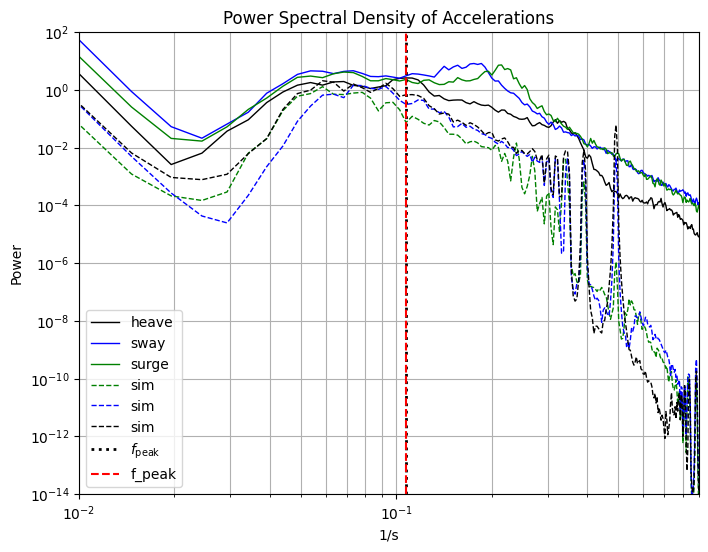

In [73]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(results['k'], results['P_eta'], label='heave', color='black', linewidth=1)
plt.plot(results_y['k'], results_y['P_eta'], label='sway', color='blue', linewidth=1)
plt.plot(results_x['k'], results_x['P_eta'], label='surge', color='green', linewidth=1)

plt.plot(results_sim_x['k'], results_sim_x['P_eta'], label='sim', color='green', linewidth=1, linestyle='--')
plt.plot(results_sim_y['k'], results_sim_y['P_eta'], label='sim', color='blue', linewidth=1, linestyle='--') 
plt.plot(results_sim['k'], results_sim['P_eta'], label='sim', color='black', linewidth=1, linestyle='--') 

ax.set_xscale('log')
ax.set_yscale('log')

# Vertical line for f_peak
f_peak = results['f_peak']
ax.axvline(x=f_peak, color='black', linestyle=':', linewidth=2, label=r'$f_{\mathrm{peak}}$')

plt.axvline(x=results['f_peak'], color='r', linestyle='--', label='f_peak')  # vertical line

plt.xlabel('1/s')               # X-axis label
plt.ylabel('Power')            # Optional Y-axis label
plt.grid(True, which='both')   # Turn on grid for both major and minor ticks
plt.legend()                   # Add legend
plt.title('Power Spectral Density of Accelerations')  # Add title
# plt.tight_layout()             # Improve spacing
plt.xlim([0.01, .9])            # Set x-axis limits
# plt.xlim([0.01, 5])            # Set x-axis limits
plt.ylim([1e-14, 1e2])            # Set y-axis limits
plt.show()


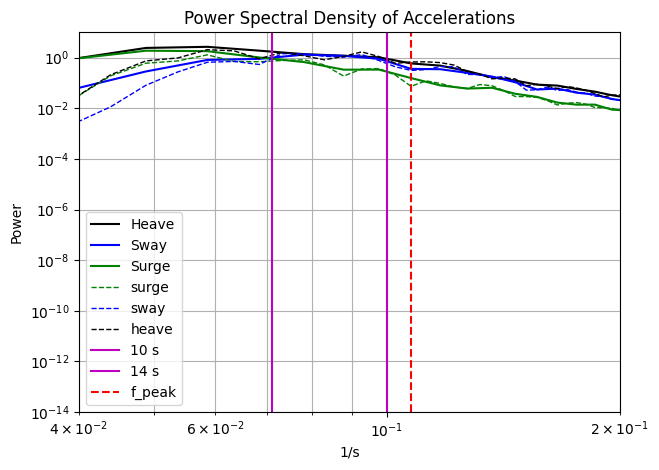

In [74]:
# Angular velocity (rad/s)
P, k  = fast_psd(orcasim['Heave'], 2**10, 10)  # heave (z) up-down motion
P2, _ = fast_psd(orcasim['Sway'], 2**10, 10) # surge (y) forwrd-backward motion
P3, _ = fast_psd(orcasim['Surge'], 2**10, 10) # sway (x) side-to-side motion

plt.loglog(k, P, label='Heave', color = 'black')
plt.loglog(k, P2, label='Sway', color = 'blue')
plt.loglog(k, P3, label='Surge', color = 'green')

plt.loglog(results_sim_x['k'], results_sim_x['P_eta'], label='surge', color='green', linewidth=1, linestyle='--')
plt.loglog(results_sim_y['k'], results_sim_y['P_eta'], label='sway', color='blue', linewidth=1, linestyle='--') 
plt.loglog(results_sim['k'], results_sim['P_eta'], label='heave', color='black', linewidth=1, linestyle='--') 


plt.axvline(x=.1, color='m', linestyle='-', label='10 s')  # vertical line
plt.axvline(x=.071, color='m', linestyle='-', label='14 s')  # vertical line
plt.axvline(x=results['f_peak'], color='r', linestyle='--', label='f_peak')  # vertical line

plt.xlabel('1/s')               # X-axis label
plt.ylabel('Power')            # Optional Y-axis label
plt.grid(True, which='both')   # Turn on grid for both major and minor ticks
plt.legend()                   # Add legend
plt.title('Power Spectral Density of Accelerations')  # Add title
plt.tight_layout()             # Improve spacing
plt.xlim([0.04, .2])            # Set x-axis limits
plt.ylim([1e-14, 1e1])            # Set y-axis limits
plt.show()



In [75]:
1/14


0.07142857142857142

This is very interesting, In the aceleration, the peak is at 9 seconds (red line) this period souns logical with what the Buoy was seing. In the aceleration it seems that the frequency is at 5 secods. a bit smaller so maybe is the double?

In [76]:
# Angular velocity (rad/s)
P, k = fast_psd(glider['PQR[0]'], 2**10, 10)
P2, _ = fast_psd(glider['PQR[1]'], 2**10, 10)
P3, _ = fast_psd(glider['PQR[2]'], 2**10, 10)

# EULER DEG CALCULATION

Following the advice of Rose, we are calcualting Euler angles from the velocity:

*But in 3D, when the body is rotating around all 3 axes, and the reference frame is rotating with the body, things get complicated because:*
1. The axes themselves are changing direction!

1. So you need to account for how the rotation in one axis affects the orientation of the others.

This is why we need to use the transformation matrix  $T^{-1} (\phi, \theta)$ to relate angular velocity to the Euler angle rates

In [77]:
import numpy as np
from scipy.integrate import solve_ivp

In [78]:
# dealing with time
# Convert real timestamps to seconds since the first one
ts = (real_time[ac] - real_time[ac][0]) /np.timedelta64(1, 's')
print(ts.size)
dt = np.diff(ts)
# forcing a even dt time
dt_e = 1/10
time_e = np.arange(0, ts.size*dt_e, dt_e)
print(time_e.size)


40829
40829


In [79]:
# Loading the data

ac = glider['ACC[0]'] < -7.5     # remove when glider is not vertical

# acelerations
# heave = glider['ACC[0]'][ac] # heave (z) up-down motion
# surge = glider['ACC[1]'][ac] # surge (y) forwrd-backward motion
# sway = glider['ACC[2]'][ac] # sway (x) Side-to-side motion

# Angular velocity (rad/s) from glider
omega_z = np.array(glider['PQR[0]'][ac]) 
omega_y = np.array(glider['PQR[1]'][ac])
omega_x = np.array(glider['PQR[2]'][ac])

# Angular velocity (rad/s) from sim
omega_z_s = np.array(orcasim['z angular velocity']) 
omega_y_s = np.array(orcasim['y angular velocity'])
omega_x_s = np.array(orcasim['x angular velocity'])

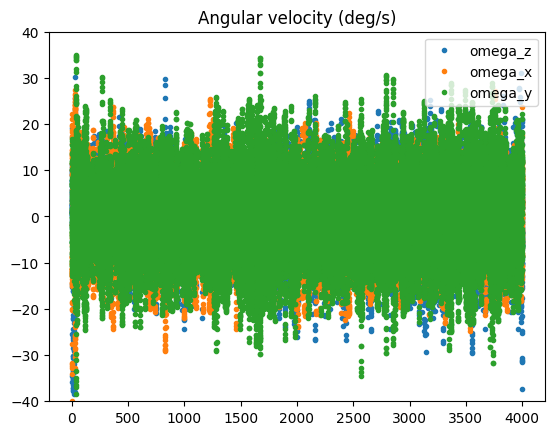

In [80]:
plt.plot(ts, np.rad2deg(omega_z), '.', label='omega_z')
plt.plot(ts, np.rad2deg(omega_x), '.', label='omega_x')
plt.plot(ts, np.rad2deg(omega_y), '.', label='omega_y')
# plt.xlim([10, 100])
plt.ylim([-40, 40])
plt.title('Angular velocity (deg/s)')
plt.legend()

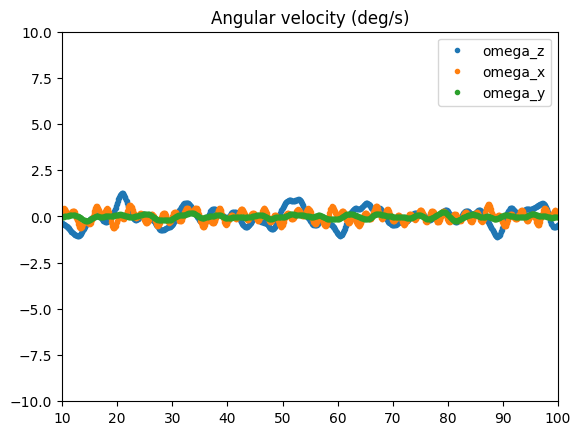

In [81]:
plt.plot(orcasim['Time'], np.rad2deg(omega_z_s), '.', label='omega_z')
plt.plot(orcasim['Time'], np.rad2deg(omega_x_s), '.', label='omega_x')
plt.plot(orcasim['Time'], np.rad2deg(omega_y_s), '.', label='omega_y')
plt.xlim([10, 100])
plt.ylim([-10, 10])
plt.title('Angular velocity (deg/s)')
plt.legend()

## REal deata

In [82]:

def highpass_filter(data, cutoff=0.1, fs=10, order=4):
    b, a = butter(order, cutoff / (0.5 * fs), btype='high', analog=False)
    return filtfilt(b, a, data)

# Apply before integration
ao = np.mean(omega_x)
bo = np.mean(omega_y)
co = np.mean(omega_z)

omega_xf = highpass_filter(omega_x-ao)
omega_yf = highpass_filter(omega_y-bo)
omega_zf = highpass_filter(omega_z-co)



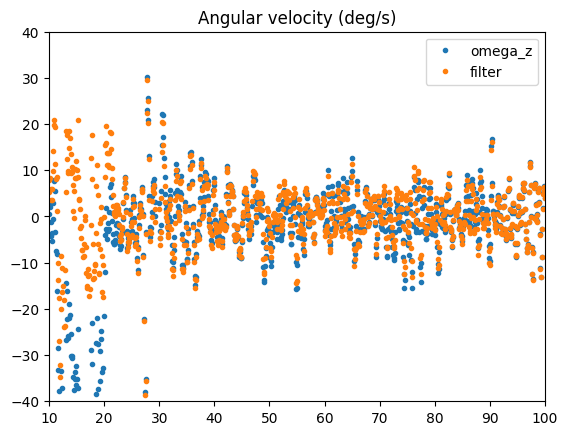

In [83]:
plt.plot(ts, np.rad2deg(omega_z), '.', label='omega_z')
plt.plot(ts, np.rad2deg(omega_zf), '.', label='filter')

plt.xlim([10, 100])
plt.ylim([-40, 40])
plt.title('Angular velocity (deg/s)')
plt.legend()

In [84]:
# Euler angles (deg)
psi = np.zeros_like(ts)  # Yaw
theta = np.zeros_like(ts) # Pitch
phi = np.zeros_like(ts) # Roll

for i in range(1, len(ts)):
    phi_i = phi[i-1]
    theta_i = theta[i-1]

    if np.isclose(np.cos(theta_i), 0):
        continue

    # Inverse transformation matrix T^{-1}(phi, theta)
    T_inv = np.array([
        [1, np.sin(phi_i)*np.tan(theta_i), np.cos(phi_i)*np.tan(theta_i)],
        [0, np.cos(phi_i), -np.sin(phi_i)],
        [0, np.sin(phi_i)/np.cos(theta_i), np.cos(phi_i)/np.cos(theta_i)]
    ])

    # Angular velocity vector at time i-1
    omega_vec = np.array([omega_x[i-1], omega_y[i-1], omega_z[i-1]])

    # Euler angle rates
    euler_dot = T_inv @ omega_vec

    # Integrate
    phi[i] = phi[i-1] + euler_dot[0] * dt[i-1]
    theta[i] = theta[i-1] + euler_dot[1] * dt[i-1]
    psi[i] = psi[i-1] + euler_dot[2] * dt[i-1]  

def wrap_to_180(angle_rad):
    return (angle_rad + np.pi) % (2 * np.pi) - np.pi

phi = wrap_to_180(phi)
theta = wrap_to_180(theta)
psi = wrap_to_180(psi)

In [85]:
gimbal_lock_idx = np.where(np.abs(theta) > np.deg2rad(85))[0]
print("Potential gimbal lock steps:", gimbal_lock_idx)

Potential gimbal lock steps: [ 3016  3017  3018 ... 40826 40827 40828]


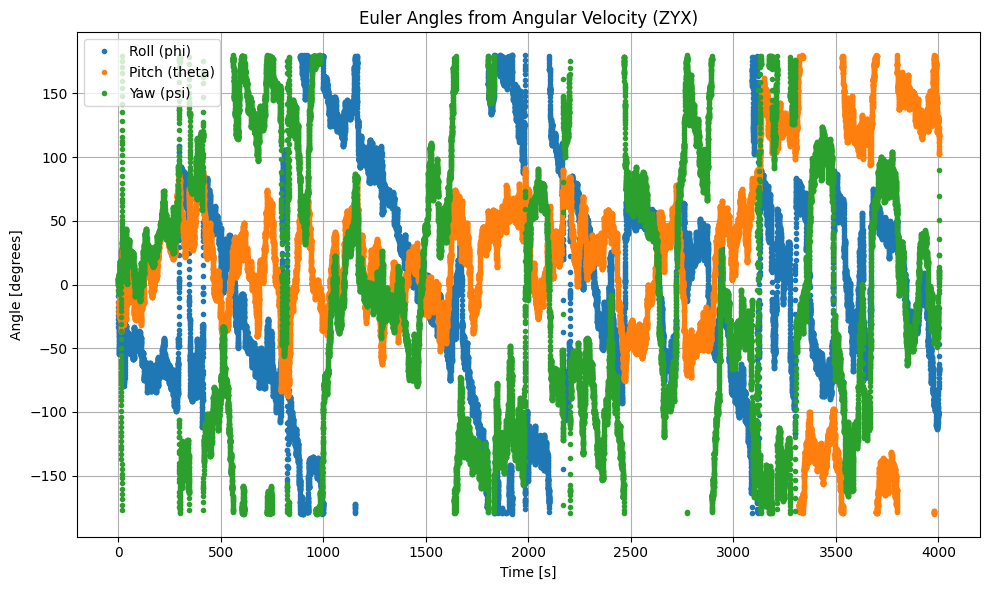

In [86]:
# ---- 4. Plot Euler angles ----
plt.figure(figsize=(10, 6))
plt.plot(ts, np.rad2deg(phi),'.' ,label='Roll (phi)')
plt.plot(ts, np.rad2deg(theta),'.', label='Pitch (theta)')
plt.plot(ts, np.rad2deg(psi),'.', label='Yaw (psi)')
plt.xlabel('Time [s]')
plt.ylabel('Angle [degrees]')
plt.title('Euler Angles from Angular Velocity (ZYX)')
# plt.ylim([-200, 200])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Now for the simulations

In [87]:
# Apply before integration
ao = np.mean(omega_x_s)
bo = np.mean(omega_y_s)
co = np.mean(omega_z_s)

omega_xf_s = highpass_filter(omega_x_s-ao)
omega_yf_s = highpass_filter(omega_y_s-bo)
omega_zf_s = highpass_filter(omega_z_s-co)

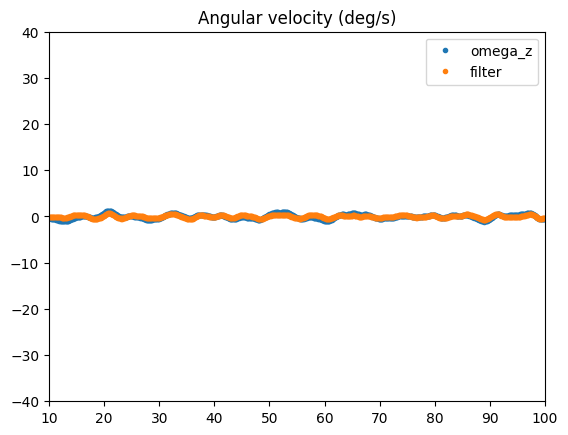

In [88]:
plt.plot(orcasim['Time'], np.rad2deg(omega_z_s), '.', label='omega_z')
plt.plot(orcasim['Time'], np.rad2deg(omega_zf_s), '.', label='filter')

plt.xlim([10, 100])
plt.ylim([-40, 40])
plt.title('Angular velocity (deg/s)')
plt.legend()

In [89]:
# Euler angles (deg)
psi_s = np.zeros_like(orcasim['Time'])  # Yaw
theta_s = np.zeros_like(orcasim['Time']) # Pitch
phi_s = np.zeros_like(orcasim['Time']) # Roll

for i in range(1, len(orcasim['Time'])):
    phi_i_s = phi_s[i-1]
    theta_i_s = theta_s[i-1]

    if np.isclose(np.cos(theta_i_s), 0):
        continue

    # Inverse transformation matrix T^{-1}(phi, theta)
    T_inv_s = np.array([
        [1, np.sin(phi_i_s)*np.tan(theta_i_s), np.cos(phi_i_s)*np.tan(theta_i_s)],
        [0, np.cos(phi_i_s), -np.sin(phi_i_s)],
        [0, np.sin(phi_i_s)/np.cos(theta_i_s), np.cos(phi_i_s)/np.cos(theta_i_s)]
    ])

    # Angular velocity vector at time i-1
    omega_vec_s = np.array([omega_x_s[i-1], omega_y_s[i-1], omega_z_s[i-1]])

    # Euler angle rates
    euler_dot_s = T_inv_s @ omega_vec_s

    # Integrate
    phi_s[i] = phi_s[i-1] + euler_dot_s[0] * dt[i-1]
    theta_s[i] = theta_s[i-1] + euler_dot_s[1] * dt[i-1]
    psi_s[i] = psi_s[i-1] + euler_dot_s[2] * dt[i-1]  

def wrap_to_180(angle_rad):
    return (angle_rad + np.pi) % (2 * np.pi) - np.pi

phi_sr = wrap_to_180(phi_s)
theta_sr = wrap_to_180(theta_s)
psi_sr = wrap_to_180(psi_s)

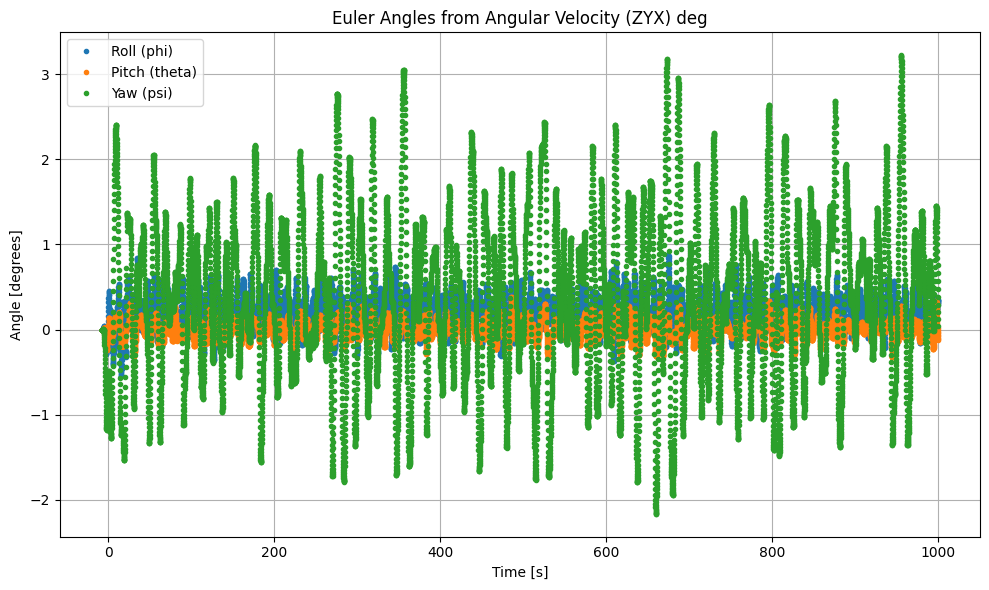

In [90]:
# ---- 4. Plot Euler angles ----
plt.figure(figsize=(10, 6))
plt.plot(orcasim['Time'], np.rad2deg(phi_s),'.' ,label='Roll (phi)')
plt.plot(orcasim['Time'], np.rad2deg(theta_s),'.', label='Pitch (theta)')
plt.plot(orcasim['Time'], np.rad2deg(psi_s),'.', label='Yaw (psi)')
plt.xlabel('Time [s]')
plt.ylabel('Angle [degrees]')
plt.title('Euler Angles from Angular Velocity (ZYX) deg')
# plt.ylim([-200, 200])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


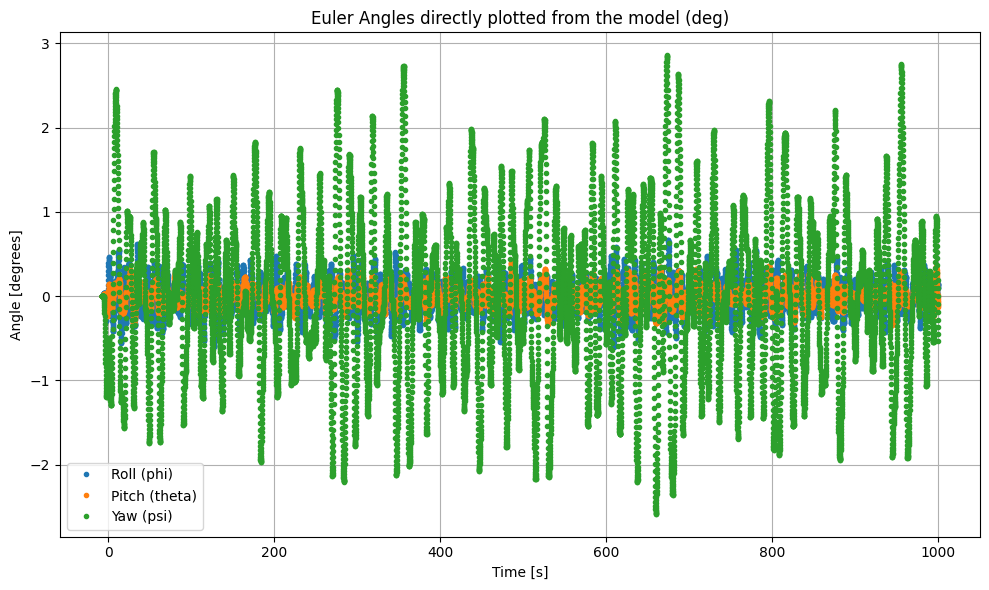

In [91]:
# ---- 4. Plot Euler angles directly form mode
#  ----
plt.figure(figsize=(10, 6))
plt.plot(orcasim['Time'],   orcasim['Roll'],'.' ,label='Roll (phi)')
plt.plot(orcasim['Time'], orcasim['Pitch'],'.', label='Pitch (theta)')
plt.plot(orcasim['Time'],  orcasim['Yaw'],'.', label='Yaw (psi)')
plt.xlabel('Time [s]')
plt.ylabel('Angle [degrees]')
plt.title('Euler Angles directly plotted from the model (deg)')
# plt.ylim([-200, 200])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Tackling RAOS!

Pices of knowledege

📌 If you try to invert your glider motion into a directional spectrum using only the 0° RAO, you're assuming all waves come from straight ahead, which is probably wrong unless you're controlling heading tightly.

In [92]:
from scipy.interpolate import interp1d
from scipy.signal import welch

In [93]:
# Loading the data

RAOS = pd.read_csv('../data/RAO_displacement_UWGlider.csv'); 

In [94]:
RAOS[1:4]

,heading,Period,surge_a,surge_p,sway_a,sway_p,heave_a,heave_p,roll_a,roll_p,pitch_a,pitch_p,yaw_a,yaw_p
1,0.0,0.6,0.1256,257.2774,0.0004,304.2365,0.0122,40.3153,0.0005,125.1759,0.1610,257.1797,0.0070,47.3922
2,0.0,0.7,0.2327,256.5412,0.0006,326.5490,0.0241,24.1475,0.0008,147.9866,0.2816,256.4154,0.0113,51.1208
3,0.0,0.8,0.3386,260.8360,0.0008,356.1631,0.0400,15.0243,0.0009,178.8268,0.3817,260.6726,0.0155,55.7478


## 1-D RAOs

In [95]:
# choosing just one direction

Direc = 0
RAOS_0 = RAOS[RAOS['heading'] == Direc]

In [96]:
raos_heave = RAOS_0['heave_a']
raos_p = RAOS_0['Period']

# RAOS frequency
raos_freq = 1/raos_p

# Apperently we need to Interpolate the RAOS to the perioed that we hav. 
raos_interp = interp1d(raos_freq, raos_heave, kind='cubic', bounds_error=False, fill_value='extrapolate')

RAO_interp = raos_interp(results_1D['k'])

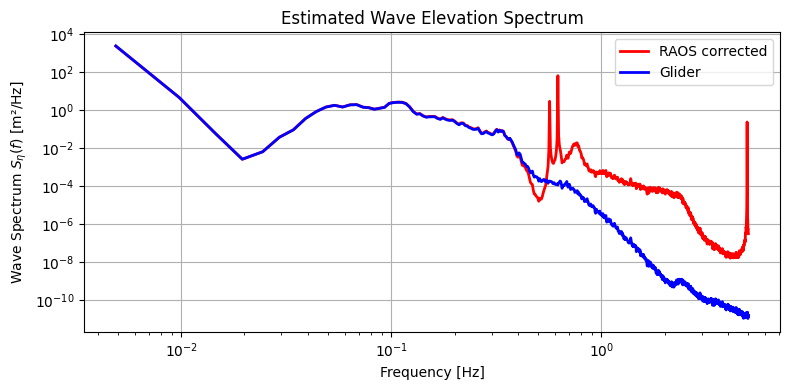

In [97]:
S_eta = results_1D['P_eta'] / (RAO_interp ** 2)

plt.figure(figsize=(8, 4))
plt.plot(results_1D['k'], S_eta, label='RAOS corrected', color='red', linewidth=2)
plt.plot(results_1D['k'], results_1D['P_eta'], label='Glider', color='blue', linewidth=2)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Wave Spectrum $S_\\eta(f)$ [m²/Hz]')
plt.title('Estimated Wave Elevation Spectrum')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


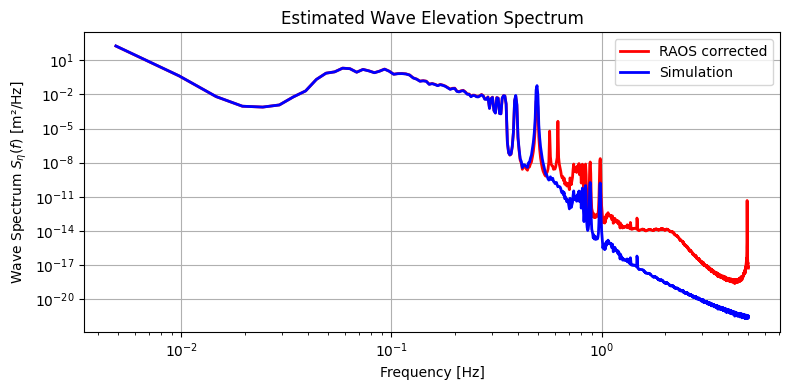

In [98]:
S_eta = results_sim['P_eta'] / (RAO_interp ** 2)
results_sim['S_eta'] = S_eta


plt.figure(figsize=(8, 4))
plt.plot(results_sim['k'], S_eta, label='RAOS corrected', color='red', linewidth=2)
plt.plot(results_sim['k'], results_sim['P_eta'], label='Simulation', color='blue', linewidth=2)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Wave Spectrum $S_\\eta(f)$ [m²/Hz]')
plt.title('Estimated Wave Elevation Spectrum')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
10**-2



0.01

    Blue (Glider PSD) and Red (RAO-corrected spectrum) overlap almost perfectly around the peak energy region (say, 0.05–0.25 Hz?)

Beyond that, the RAO correction:

Boosts high-frequency energy — this is expected since the glider under-responds at high f (the RAO is small, so dividing by it amplifies noise).

Smoothly adjusts the lower tail — but little energy lives there anyway.

## 2D RAOS and Directional

### Extract data

In [100]:
# Organizing data
directions = RAOS['heading'].unique()

RAOs_d = {}

for direc in directions:
    raos_data = RAOS[RAOS['heading'] == direc].copy()

    RAOs_d[direc] = {
        'Period': raos_data['Period'].values,
        'heave_amp': raos_data['heave_a'].values,
        'heave_phase': raos_data['heave_p'].values,
        'pitch_amp': raos_data['pitch_a'].values,
        'pitch_phase': raos_data['pitch_p'].values
        # add more DOFs if needed
    }

### Pitch and heave calcuations

In [101]:
from scipy.signal import csd, welch

fs = 10  # sampling rate
nperseg = 1024*2

f, S_11 = welch(orcasim['Heave'], fs=fs, nperseg=nperseg)  # heave auto-spectrum
_, S_22 = welch(np.deg2rad(orcasim['Pitch']), fs=fs, nperseg=nperseg)  # pitch auto-spectrum
_, S_12 = csd(orcasim['Heave'], np.deg2rad(orcasim['Pitch']), fs=fs, nperseg=nperseg)  # cross-spectrum

# Cross-spectral matrix at each frequency f:
# S_matrix[f] = [[S_11, S_12],
#                [S_12*, S_22]]

In [102]:
2**10

1024

In [103]:
k.shape

(512,)

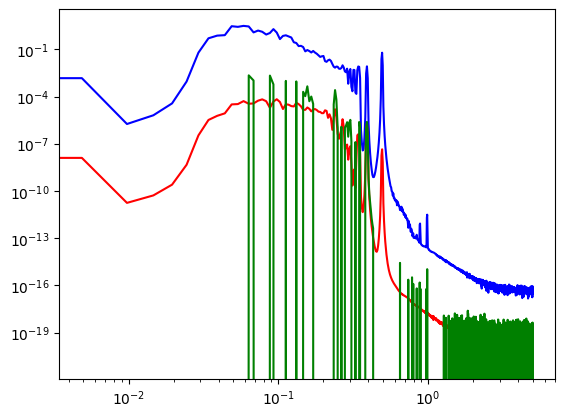

In [104]:
plt.loglog(f, S_11, label='Heave Auto-Spectrum', color='blue')
plt.loglog(f, S_22, label='Heave Auto-Spectrum', color='red')
plt.loglog(f, S_12.real, label='Cross-Spectrum', color='green')

Now we do the look to get a Transfer functiions


In [105]:
# H_matrix: shape = [n_freqs, n_directions, n_dofs]
H_matrix = np.zeros((len(f), len(directions), 2), dtype=complex)

for j, theta in enumerate(directions):
    raos = RAOs_d[theta]

    # Convert period to frequency
    f_rao = 1 / np.array(raos['Period'])

    # Heave RAO
    amp_heave = np.array(raos['heave_amp'])
    phase_heave = np.deg2rad(np.array(raos['heave_phase']))
    rao_heave = amp_heave * np.exp(1j * phase_heave)
    interp_heave = interp1d(f_rao, rao_heave, bounds_error=False, fill_value='extrapolate')
    
    # Pitch RAO
    amp_pitch = np.array(raos['pitch_amp'])
    phase_pitch = np.deg2rad(np.array(raos['pitch_phase']))
    rao_pitch = amp_pitch * np.exp(1j * phase_pitch)
    interp_pitch = interp1d(f_rao, rao_pitch, bounds_error=False, fill_value='extrapolate')
    
    # Store interpolated RAOs at each frequency
    H_matrix[:, j, 0] = interp_heave(f)   # DOF 1: Heave
    H_matrix[:, j, 1] = interp_pitch(f)   # DOF 2: Pitch


In [106]:
H_matrix.shape



(1025, 8, 2)

## Trying MLM

In [107]:
S_dir = np.zeros((len(f), len(directions)))  # [frequency, direction]

for i in range(len(f)):
    # 1. Cross-spectral matrix from data
    Sxx = np.array([
        [S_11[i], S_12[i]],
        [np.conj(S_12[i]), S_22[i]]
    ])

    # 2. Transfer function matrix H: shape (2 DOFs, 8 directions) for each frequency 
    H = H_matrix[i, :, :].T  # shape (2, 8)

    # 3. Solve MLM using pseudo-inverse
    G = np.linalg.pinv(H.conj().T @ H) @ (H.conj().T @ Sxx @ H)

    
    # S_dir[i, :] = np.real(np.diag(G))
      # 4. Extract and clip the directional spectrum
    S_dir[i, :] = np.maximum(0, np.real(np.diag(G)))


In [108]:
1/0.059

16.949152542372882

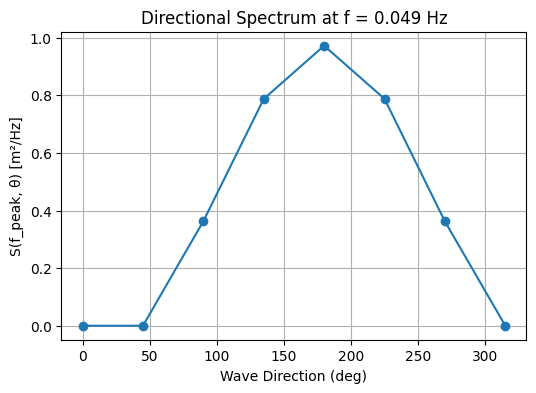

In [109]:
# Plot directional spectrum at peak frequency
i_peak = np.argmax(np.sum(S_dir, axis=1))
S_theta = S_dir[i_peak, :]

plt.figure(figsize=(6,4))
plt.plot(directions, S_theta, marker='o')
plt.xlabel('Wave Direction (deg)')
plt.ylabel('S(f_peak, θ) [m²/Hz]')
plt.title(f'Directional Spectrum at f = {f[i_peak]:.3f} Hz')
plt.grid(True)
plt.show()


In [110]:
try:
   interp_eta
except NameError:
    print("my_variable does not exist")
else:
    print("my_variable exists")


my_variable exists


In [111]:
# k.shape
f.shape

(1025,)

In [112]:

# We interpolate the frequencies of S_eta to S_dir and then look for the back
# Interpolate S_eta onto S_dir's frequency grid
k = (results_sim['k'])
S_eta = results_sim['S_eta']

interp_eta = interp1d(k, S_eta, kind='cubic', bounds_error=False, fill_value=0)
S_eta_interp = interp_eta(f)  # f = frequency vector used in S_dir

# Mask of frequencies in range
band_mask = (f >= fmin) & (f <= fmax)


peaks, _ = find_peaks(S_eta_interp[band_mask])
peak_values = S_eta_interp[band_mask][peaks]

top_two_idx = np.argsort(peak_values)[-2:]
sorted_peaks = peaks[top_two_idx[np.argsort(-peak_values[top_two_idx])]]

i_peak1 = np.where(band_mask)[0][sorted_peaks[0]]
i_peak2 = np.where(band_mask)[0][sorted_peaks[1]]

print(f"Peak 1 frequency: {k[i_peak1]:.3f} Hz")
print(f"Peak 2 frequency: {k[i_peak2]:.3f} Hz")


NameError: name 'fmin' is not defined

In [113]:
from scipy.signal import find_peaks

# Define frequency band of interest
fmin, fmax = 0.05, 0.5
k = (results_sim['k'])
# Mask of frequencies in range
band_mask = (k >= fmin) & (k <= fmax)
band_mask_dir = (f >= fmin) & (f <= fmax)

S_eta_f  = results_sim['P_eta'][band_mask]
fi = results_sim['k'][band_mask]


peaks, _ = find_peaks(S_eta_f)
peak_values = S_eta_f[peaks]

# Get indices of the top 2 peaks
top_two_idx = np.argsort(peak_values)[-2:]  # last two are biggest

# Sort them so the primary peak is first
sorted_peaks = peaks[top_two_idx[np.argsort(-peak_values[top_two_idx])]]

i_peak1 = sorted_peaks[0]
i_peak2 = sorted_peaks[1]

results_sim['f_peak1'] = fi[i_peak1]
results_sim['f_peak2'] = fi[i_peak2]
 
print(f"Peak 1 frequency: {fi[i_peak1]:.3f} Hz")
print(f"Peak 2 frequency: {fi[i_peak2]:.3f} Hz")

# Finding the correct index


Peak 1 frequency: 0.059 Hz
Peak 2 frequency: 0.093 Hz


In [ ]:
plt.loglog(k,results_sim['P_eta'])

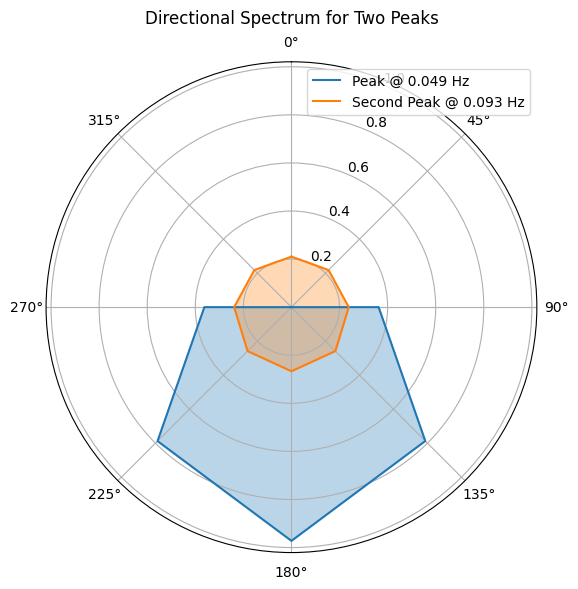

In [122]:

directions_deg = np.array([0, 45, 90, 135, 180, 225, 270, 315])
directions_rad = np.deg2rad(directions_deg)

# Real S_theta from your result

i_match = np.argmin(np.abs(f - fi[i_peak2]))

S_theta = S_dir[i_peak, :]  # shape (8,)
S_theta2 = S_dir[i_match, :]  # shape (8,)


# Close the circle
directions_rad = np.append(directions_rad, directions_rad[0])
S1 = np.append(S_theta, S_theta[0])
S2 = np.append(S_theta2, S_theta2[0])

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6,6))

ax.plot(directions_rad, S1, label=f'Peak @ {f[i_peak]:.3f} Hz', color='tab:blue')
ax.fill(directions_rad, S1, alpha=0.3, color='tab:blue')

ax.plot(directions_rad, S2, label=f'Second Peak @ {f[i_match]:.3f} Hz', color='tab:orange')
ax.fill(directions_rad, S2, alpha=0.3, color='tab:orange')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)


ax.set_title("Directional Spectrum for Two Peaks", va='bottom')
ax.legend(loc='upper right')


plt.tight_layout()
plt.show()


In [124]:
1/0.093

10.75268817204301

In [115]:

for theta in directions:
    j = np.where(directions == theta)[0][0]  # get the index of this direction
    rao = H_matrix[i_peak, j, :]  # access RAOs for this direction
    print(f"{theta}°: |heave|={np.abs(rao[0]):.3f}, |pitch|={np.abs(rao[1]):.3f}")


0.0°: |heave|=0.998, |pitch|=0.004
45.0°: |heave|=0.998, |pitch|=0.003
90.0°: |heave|=0.998, |pitch|=0.000
135.0°: |heave|=0.998, |pitch|=0.003
180.0°: |heave|=0.998, |pitch|=0.004
225.0°: |heave|=0.998, |pitch|=0.003
270.0°: |heave|=0.998, |pitch|=0.000
315.0°: |heave|=0.998, |pitch|=0.003


In [118]:
# Define frequency band of interest
fmin, fmax = 0.05, 0.5

# Mask of frequencies in range
band_mask = (k >= fmin) & (k <= fmax)
band_mask_dir = (f >= fmin) & (f <= fmax)

# Average frequency bin width (can refine this if non-uniform)
df = np.mean(np.diff(f))

# 1D total energy in band
E_1D = np.sum(S_eta[band_mask]) * df

# Directional total energy in band (sum over directions, then over frequency)
E_dir = np.sum(S_dir[band_mask_dir, :]) * df

# Compare
print(f"1D energy in band [{fmin}, {fmax}] Hz: {E_1D:.4f} m²")
print(f"Directional energy in band:             {E_dir:.4f} m²")
print(f"Ratio (dir / 1D):                       {E_dir / E_1D:.2f}")



1D energy in band [0.05, 0.5] Hz: 0.0906 m²
Directional energy in band:             0.1116 m²
Ratio (dir / 1D):                       1.23


In [ ]:
S_dir.shape

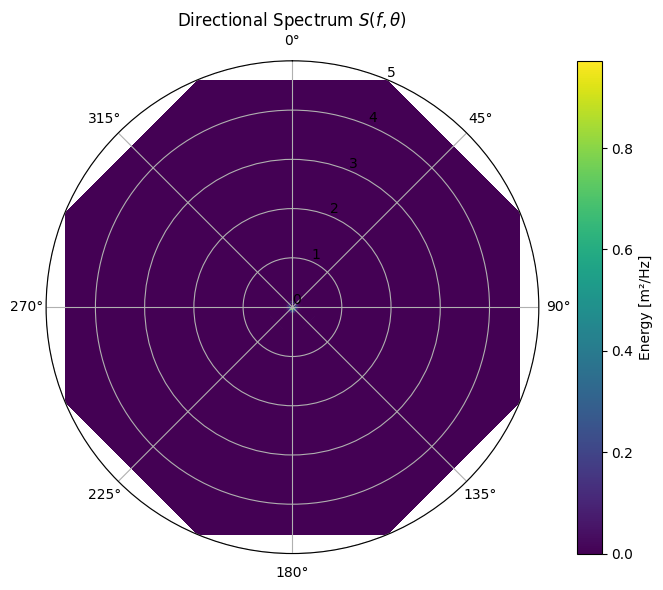

In [117]:


# Assume:
# - S_dir: [n_freq, n_dir]
# - f: frequency vector
# - directions: in degrees

# Convert to radians and meshgrid for plotting
theta = np.deg2rad(directions)
r, theta_grid = np.meshgrid(f, theta, indexing='ij')  # shape: (n_freq, n_dir)

# Transpose S_dir if needed to match shape (n_freq, n_dir)
Z = S_dir  # (shape should be n_freq, n_dir)

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
c = ax.pcolormesh(theta_grid, r, Z, shading='auto', cmap='viridis')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Directional Spectrum $S(f,\\theta)$")
cb = fig.colorbar(c, ax=ax, label='Energy [m²/Hz]')
plt.tight_layout()
plt.show()

